### OB第二次給的資料(包括主款以及搭配款標籤)

In [2]:
import pandas as pd
from pandas.core.frame import DataFrame
import torch
from torchvision import transforms
from PIL import Image
import os
from tqdm import tqdm
import cv2
import numpy as np
from torchvision import datasets, transforms

import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from torch.autograd import Variable

import shutil
from shutil import copy


c:\Users\YUDE ZHOU\miniconda3\envs\pytorch8019\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\YUDE ZHOU\miniconda3\envs\pytorch8019\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


---

### 裁減@1資料夾的圖片

In [3]:
#主款+搭配款
at_one = os.listdir('@1jpg')
len(at_one)

11263

In [4]:
if os.path.exists("crop_@1jpg") == False:
    os.mkdir("crop_@1jpg")
cant_crop = []

transform=transforms.Compose([
    transforms.Resize(224), 
    transforms.CenterCrop([112,150]),
])

pbar=tqdm(total=len(at_one))
for img in at_one:
    try:
        path="@1jpg/"+img
        pil_img=Image.open(path)
        ttt=transform(pil_img)
        save_dir="crop_@1jpg/"+img
        ttt.save(save_dir)
        pbar.update(1)
    except:
        cant_crop.append(img)
pbar.close()

 98%|█████████▊| 11025/11263 [08:22<00:10, 21.93it/s]


In [11]:
cant_crop

['A1316821.jpg',
 'A16650.jpg',
 'AA3465.jpg',
 'AB10661.jpg',
 'AB11371.jpg',
 'AB12187.jpg',
 'AB12267.jpg',
 'AB1243.jpg',
 'AB13166.jpg',
 'AB13286.jpg',
 'AB13289.jpg',
 'AB13356.jpg',
 'AB13364.jpg',
 'AB13461.jpg',
 'AB13478.jpg',
 'AB13688.jpg',
 'AB13720.jpg',
 'AB13775.jpg',
 'AB13922.jpg',
 'AB14165.jpg',
 'AB14430.jpg',
 'AB7881.jpg',
 'AB8200.jpg',
 'AB9130.jpg',
 'AB9142.jpg',
 'AB9151.jpg',
 'BA3297.jpg',
 'BA4599.jpg',
 'BA4623.jpg',
 'BA4739.jpg',
 'BA5049.jpg',
 'BA5402.jpg',
 'BA5403.jpg',
 'BA5408.jpg',
 'BA5411.jpg',
 'BA5435.jpg',
 'BA5440.jpg',
 'BA5489.jpg',
 'BA5499.jpg',
 'BA5547.jpg',
 'BA5621.jpg',
 'BA5748.jpg',
 'BA5749.jpg',
 'BA5752.jpg',
 'BA5794.jpg',
 'BA5840.jpg',
 'BA5951.jpg',
 'BA5975.jpg',
 'BA6023.jpg',
 'BA6029.jpg',
 'BA6132.jpg',
 'CA1902.jpg',
 'CA1919.jpg',
 'CA2052.jpg',
 'CA2060.jpg',
 'CA2077.jpg',
 'CA2081.jpg',
 'CA2093.jpg',
 'CA2215.jpg',
 'CA2951.jpg',
 'CAZ033.jpg',
 'DA3516.jpg',
 'DA7332.jpg',
 'DD6638.jpg',
 'EA0997.jpg',
 'EA20

In [19]:
#根據因為無法讀取導致沒辦法裁減的圖片 從table中刪掉
fit_df = pd.read_csv("OB second/圖片搭配_款號搭配(已去重，改網址).csv",index_col=0)
for i,item in enumerate(tqdm(cant_crop)):
    item_no = str(item)[:-4]
    if item_no in list(fit_df['款號']):
        fit_df.drop(fit_df.loc[fit_df['款號'] == str(item)[:-4]].index, inplace=True)
    if item_no in list(fit_df['搭配款']):
        fit_df.drop(fit_df.loc[fit_df['搭配款'] == str(item)[:-4]].index, inplace=True)
fit_df.to_csv("OB second/圖片搭配_款號搭配(已去重，改網址，扣裁減失敗).csv",encoding='utf-8-sig')
fit_df

100%|██████████| 238/238 [00:01<00:00, 143.69it/s]


,款號,款號品類,圖片,搭配款,搭配款品類,搭配款主圖,平拍圖
index,,,,,,,
0,AB10078,上衣,https://image.obdesign.com.tw/catalog/products...,BA4933,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
1,AB10078,上衣,https://image.obdesign.com.tw/catalog/products...,BA4789,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
2,AB10113,上衣,https://image.obdesign.com.tw/catalog/products...,BA5022,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
3,AB10113,上衣,https://image.obdesign.com.tw/catalog/products...,BA5070,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
4,AB10113,上衣,https://image.obdesign.com.tw/catalog/products...,BA5025,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
...,...,...,...,...,...,...,...
5578,QA1629,褲子,https://image.obdesign.com.tw/catalog/products...,QA1224,上衣,https://image.obdesign.com.tw/catalog/products...,NaN
5579,QA1632,褲子,https://image.obdesign.com.tw/catalog/products...,QA1388,上衣,https://image.obdesign.com.tw/catalog/products...,https://image.obdesign.com.tw/catalog/products...
5580,QA1632,褲子,https://image.obdesign.com.tw/catalog/products...,QA1634,上衣,https://image.obdesign.com.tw/catalog/products...,https://image.obdesign.com.tw/catalog/products...


### 根據主款_搭配款的table標籤，把兩張圖片拼在一起

因為怕之後要篩選不合格的圖片 所以先merge再抽樣

In [20]:
fit_df = pd.read_csv("OB second/圖片搭配_款號搭配(已去重，改網址，扣裁減失敗).csv",index_col=0)
fit_df

,款號,款號品類,圖片,搭配款,搭配款品類,搭配款主圖,平拍圖
index,,,,,,,
0,AB10078,上衣,https://image.obdesign.com.tw/catalog/products...,BA4933,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
1,AB10078,上衣,https://image.obdesign.com.tw/catalog/products...,BA4789,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
2,AB10113,上衣,https://image.obdesign.com.tw/catalog/products...,BA5022,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
3,AB10113,上衣,https://image.obdesign.com.tw/catalog/products...,BA5070,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
4,AB10113,上衣,https://image.obdesign.com.tw/catalog/products...,BA5025,褲子,https://image.obdesign.com.tw/catalog/products...,NaN
...,...,...,...,...,...,...,...
5578,QA1629,褲子,https://image.obdesign.com.tw/catalog/products...,QA1224,上衣,https://image.obdesign.com.tw/catalog/products...,NaN
5579,QA1632,褲子,https://image.obdesign.com.tw/catalog/products...,QA1388,上衣,https://image.obdesign.com.tw/catalog/products...,https://image.obdesign.com.tw/catalog/products...
5580,QA1632,褲子,https://image.obdesign.com.tw/catalog/products...,QA1634,上衣,https://image.obdesign.com.tw/catalog/products...,https://image.obdesign.com.tw/catalog/products...


In [23]:
if os.path.exists("merge_fit") == False:
    os.mkdir("merge_fit")
def merge_img(df):

    pbar=tqdm(total=len(fit_df))    
    for i,item in tqdm(fit_df.iterrows()):
        main = item[0]
        sub = item[3]
        main_path = "crop_@1jpg/" + main + ".jpg"
        sub_path = "crop_@1jpg/" + sub + ".jpg"
        main_img = cv2.imread(main_path)
        sub_img = cv2.imread(sub_path)
        fit_img = np.vstack([main_img,sub_img])
        fit_img_path = "merge_fit/" + "fit" + str(i) + ".png" 
        cv2.imwrite(fit_img_path,fit_img)
        pbar.update(1)
merge_img(fit_df)        

11009it [01:33, 117.17it/s]9 [01:33<00:00, 117.05it/s]
100%|██████████| 11009/11009 [01:33<00:00, 117.17it/s]


---

### 利用全部的新OB資料集

In [4]:
fit=os.listdir("filtered data/fit")
not_fit=os.listdir("filtered data/not_fit")
fit=DataFrame(fit)
not_fit=DataFrame(not_fit)
fit.rename(columns={0:'fit'},inplace=True)
not_fit.rename(columns={0:'not_fit'},inplace=True)
print(f'fit have {len(fit)} pics')
print(f'not_fit have {len(not_fit)} pics')


fit have 3687 pics
not_fit have 1574 pics


In [17]:
train_fit=fit
train_not_fit=not_fit
test_fit=train_fit.sample(737,random_state=168)
test_not_fit=train_not_fit.sample(314,random_state=62)
train_fit = train_fit.drop(test_fit.index)
train_not_fit = train_not_fit.drop(test_not_fit.index)

train_fit = train_fit.sort_values(by=["fit"]).reset_index(drop=True)
train_not_fit = train_not_fit.sort_values(by=["not_fit"]).reset_index(drop=True)
test_fit = test_fit.sort_values(by=["fit"]).reset_index(drop=True)
test_not_fit = test_not_fit.sort_values(by=["not_fit"]).reset_index(drop=True)
print(f'train fit have {len(train_fit)} sample pics')
print(f'train not_fit have {len(train_not_fit)} sample pics')
print(f'test fit have {len(test_fit)} sample pics')
print(f'test not_fit have {len(test_not_fit)} sample pics')


train fit have 2950 pics
train not_fit have 1260 pics
test fit have 737 pics
test not_fit have 314 pics


In [36]:
for i in tqdm(list(train_fit['fit'])):
    i=str(i)
    origin = "filtered data/fit/"+i
    target = "original/train/fit/"+i
    shutil.copyfile(origin,target)
for i in tqdm(list(test_fit['fit'])):
    i=str(i)
    origin = "filtered data/fit/"+i
    target = "original/test/fit/"+i
    shutil.copyfile(origin,target)
for i in tqdm(list(train_not_fit['not_fit'])):
    i=str(i)
    origin = "filtered data/not_fit/"+i
    target = "original/train/not_fit/"+i
    shutil.copyfile(origin,target)
for i in tqdm(list(test_not_fit['not_fit'])):
    i=str(i)
    origin = "filtered data/not_fit/"+i
    target = "original/test/not_fit/"+i
    shutil.copyfile(origin,target)


100%|██████████| 314/314 [00:00<00:00, 4819.82it/s]


---

### 參雜舊的OB資料集進去訓練跟測試，避免視覺上相差太大

In [2]:
2950 * 0.5

1475.0

In [4]:
1260 *0.5

630.0

In [5]:
737*0.5

368.5

In [6]:
314*0.5

157.0

In [8]:
o_trainfit = os.listdir("old data/train/fit")
o_trainnotfit = os.listdir("old data/train/not_fit")
o_testfit = os.listdir("old data/test/fit")
o_testnotfit = os.listdir("old data/test/not_fit")

o_trainfit_df = DataFrame(o_trainfit)
o_trainnotfit_df = DataFrame(o_trainnotfit)
o_testfit_df = DataFrame(o_testfit)
o_testnotfit_df = DataFrame(o_testnotfit)

o_trainfit_df.rename(columns={0:'fit'},inplace=True)
o_trainnotfit_df.rename(columns={0:'not_fit'},inplace=True)
o_testfit_df.rename(columns={0:'fit'},inplace=True)
o_testnotfit_df.rename(columns={0:'not_fit'},inplace=True)
print(f'old train fit have {len(o_trainfit_df)} pics')
print(f'old train notfit have {len(o_trainnotfit_df)} pics')
print(f'old test fit have {len(o_testfit_df)} pics')
print(f'old test notfit have {len(o_testnotfit_df)} pics')


old train fit have 5615 pics
old train notfit have 2410 pics
old test fit have 1400 pics
old test notfit have 575 pics


In [9]:
o_tr_fit = o_trainfit_df.sample(1475,random_state=128)
o_tr_notfit =o_trainnotfit_df.sample(630,random_state=96)
o_te_fit = o_testfit_df.sample(368,random_state=48)
o_te_notfit = o_testnotfit_df.sample(157,random_state=37)

o_tr_fit = o_tr_fit.sort_values(by=["fit"]).reset_index(drop=True)
o_tr_notfit = o_tr_notfit.sort_values(by=["not_fit"]).reset_index(drop=True)
o_te_fit = o_te_fit.sort_values(by=["fit"]).reset_index(drop=True)
o_te_notfit = o_te_notfit.sort_values(by=["not_fit"]).reset_index(drop=True)

print(f'old train fit have {len(o_tr_fit)} sample pics')
print(f'old train notfit have {len(o_tr_notfit)} sample pics')
print(f'old test fit have {len(o_te_fit)} sample pics')
print(f'old test notfit have {len(o_te_notfit)} sample pics')

old train fit have 1475 sample pics
old train notfit have 630 sample pics
old test fit have 368 sample pics
old test notfit have 157 sample pics


In [15]:
os.mkdir("old sample data")
os.mkdir("old sample data/train")
os.mkdir("old sample data/test")
os.mkdir("old sample data/train/fit")
os.mkdir("old sample data/train/not_fit")
os.mkdir("old sample data/test/fit")
os.mkdir("old sample data/test/not_fit")

for i in tqdm(list(o_tr_fit['fit'])):
    i=str(i)
    origin = "old data/train/fit/"+i
    target = "old sample data/train/fit/"+i
    shutil.copyfile(origin,target)
for i in tqdm(list(o_tr_notfit['not_fit'])):
    i=str(i)
    origin = "old data/train/not_fit/"+i
    target = "old sample data/train/not_fit/"+i
    shutil.copyfile(origin,target)
for i in tqdm(list(o_te_fit['fit'])):
    i=str(i)
    origin = "old data/test/fit/"+i
    target = "old sample data/test/fit/"+i
    shutil.copyfile(origin,target)
for i in tqdm(list(o_te_notfit['not_fit'])):
    i=str(i)
    origin = "old data/test/not_fit/"+i
    target = "old sample data/test/not_fit/"+i
    shutil.copyfile(origin,target)

100%|██████████| 157/157 [00:00<00:00, 5976.80it/s]


---

### 切圖片

In [2]:
transform=transforms.Compose([
   transforms.CenterCrop([560,450]),
    transforms.Resize([224,224]),
])

In [34]:
train_fail=[]
test_fail=[]
for img in tqdm(os.listdir("original 2styles data/train/fit")):
        try:
            path="original 2styles data/train/"+i+"/"+img
            pil_img=Image.open(path)
            t=transform(pil_img)
            save_dir="train_crop/"+"fit"+"/"+img
            t.save(save_dir)
        except:
            train_fail.append([i,img])
for img in tqdm(os.listdir("original 2styles data/test/fit")):
        try:
            path="original 2styles data/test/"+i+"/"+img
            pil_img=Image.open(path)
            t=transform(pil_img)
            save_dir="test_crop/"+"fit"+"/"+img
            t.save(save_dir)
        except:
            test_fail.append([i,img])
for img in tqdm(os.listdir("original 2styles data/train/no_fit")):
        try:
            path="original 2styles data/train/"+"no_fit"+"/"+img
            pil_img=Image.open(path)
            t=transform(pil_img)
            save_dir="train_crop/"+"no_fit"+"/"+img
            t.save(save_dir)
        except:
            train_fail.append([i,img])
for img in tqdm(os.listdir("original 2styles data/test/no_fit")):
        try:
            path="original 2styles data/test/"+"no_fit"+"/"+img
            pil_img=Image.open(path)
            t=transform(pil_img)
            save_dir="test_crop/"+"no_fit"+"/"+img
            t.save(save_dir)
        except:
            test_fail.append([i,img])


0it [00:00, ?it/s]
0it [00:00, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'original 2styles data/train/no_fit'

In [4]:
train_fail=[]
test_fail=[]
fon = ["fit","not_fit"]
for i in fon:
    for train_img in tqdm(os.listdir("original/train/"+i)):
        try:
            path="original/train/"+i+"/"+train_img
            pil_img=Image.open(path)
            t=transform(pil_img)
            save_dir="train_crop/"+i+"/"+train_img
            t.save(save_dir)
        except:
            train_fail.append([i,train_img])
for j in fon:
    for test_img in tqdm(os.listdir("original/test/"+i)):
        try:
            path="original/test/"+i+"/"+test_img
            pil_img=Image.open(path)
            t=transform(pil_img)
            save_dir="test_crop/"+i+"/"+test_img
            t.save(save_dir)
        except:
            test_fail.append([i,test_img])

100%|██████████| 314/314 [00:06<00:00, 49.52it/s]


---

### Start training

In [2]:
transform2=transforms.Compose([
    transforms.Resize([224,224]), #缩放图片，保持长宽比不变，最短边的长为224像素,
    transforms.ToTensor(), #将图片转换为Tensor,归一化至[0,1]
    transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5]) #标准化至[-1,1]
])

batch_size=64

train_dir = "train_crop"           
#定義數據集
train_datasets = datasets.ImageFolder(train_dir, transform=transform2)
#加載數據集
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)

val_dir = "test_crop"		
val_datasets = datasets.ImageFolder(val_dir, transform=transform2)
val_dataloader = torch.utils.data.DataLoader(val_datasets, batch_size=batch_size, shuffle=False)

In [3]:
class ResNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ResNet, self).__init__()
        net = models.resnet18(pretrained=False)
        net.fc = nn.Sequential()
        self.model = net
        # 鎖定 ResNet18 預訓練模型參數
        #for param in self.model.parameters():
        #    param.requires_grad = False

        # 修改輸出層輸出數量
        self.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(128, num_classes)
        )
        

    def forward(self, x):
        x = self.model(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [4]:
model = ResNet().to("cuda")

In [5]:
model

ResNet(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [6]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=.25, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        if isinstance(alpha, (float, int)): self.alpha = torch.tensor([alpha, 1 - alpha])
        if isinstance(alpha, list): self.alpha = torch.tensor(alpha)
        self.reduction = reduction

    def forward(self, inputs, targets):
        CE_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-CE_loss)
        focal_loss = (1 - pt) ** self.gamma * CE_loss

        if self.alpha is not None:
            if self.alpha.device != inputs.device:
                self.alpha = self.alpha.to(inputs.device)
            focal_loss = self.alpha[targets] * focal_loss

        if self.reduction == 'mean':
            return torch.mean(focal_loss)
        elif self.reduction == 'sum':
            return torch.sum(focal_loss)
        else:
            return focal_loss

In [7]:
optimizer = optim.Adam(model.parameters(), lr=5e-4)

loss_func = FocalLoss()

In [8]:
# # 損失函數
# loss_func = nn.CrossEntropyLoss()

# # 學習優化器
# optimizer = torch.optim.SGD(model.parameters(), lr=5e-2)#5的負2次方

In [9]:
epoch=20

if torch.cuda.is_available():
    model.cuda()


model.train()

loss_list = []
accuracy_list = []
tr_loss_list = []
tr_accuracy_list = []
#先把混淆矩陣要用得list加在前面
y_true=[]
y_pred=[]

for i in range(epoch):
    print('epoch {}'.format(i + 1))
    train_loss = 0.
    train_acc = 0.
    pbar=tqdm(total=len(train_dataloader))
    for img, label in train_dataloader:
        img = Variable(img).cuda()
        label = Variable(label).cuda()
        optimizer.zero_grad()
        output = model(img)
        loss = loss_func(output, label)
        train_loss += loss.item()
        pred = torch.max(output, 1)[1]
        train_correct = (pred == label).sum()
        train_acc += train_correct.item()
        loss.backward()
        optimizer.step()
        pbar.update(1)
    pbar.close()

    print('Train Loss: {:.6f}, Acc: {:.6f}'.format(train_loss / (len(train_datasets)), train_acc / (len(train_datasets))))
    tr_loss_list.append(train_loss / (len(train_datasets)))
    tr_accuracy_list.append(100 * train_acc / (len(train_datasets)))
    # evaluation--------------------------------
    model.eval()
    eval_loss = 0.
    eval_acc = 0.
    for img, label in val_dataloader:
        img = Variable(img).cuda()
        label = Variable(label).cuda()
        out = model(img)
        loss = loss_func(out, label)
        eval_loss += loss.item()
        pred = torch.max(out, 1)[1]
        num_correct = (pred == label).sum()
        eval_acc += num_correct.item()
        
        #混淆矩陣要用的
        y_true.extend(label.cpu().tolist())
        y_pred.extend(pred.cpu().tolist())
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss / (len(val_datasets)), eval_acc / (len(val_datasets))))
    loss_list.append(eval_loss / (len(val_datasets)))
    accuracy_list.append(100 * eval_acc / (len(val_datasets)))

epoch 1


100%|██████████| 99/99 [01:00<00:00,  1.63it/s]


Train Loss: 0.001075, Acc: 0.476160
Test Loss: 0.002130, Acc: 0.376904
epoch 2


100%|██████████| 99/99 [00:55<00:00,  1.77it/s]


Train Loss: 0.001100, Acc: 0.346903
Test Loss: 0.001097, Acc: 0.298858
epoch 3


100%|██████████| 99/99 [00:54<00:00,  1.81it/s]


Train Loss: 0.001076, Acc: 0.299065
Test Loss: 0.001096, Acc: 0.298858
epoch 4


100%|██████████| 99/99 [00:58<00:00,  1.68it/s]


Train Loss: 0.001075, Acc: 0.299065
Test Loss: 0.001095, Acc: 0.298858
epoch 5


100%|██████████| 99/99 [00:58<00:00,  1.69it/s]


Train Loss: 0.001046, Acc: 0.417709
Test Loss: 0.001096, Acc: 0.298858
epoch 6


100%|██████████| 99/99 [00:58<00:00,  1.69it/s]


Train Loss: 0.001038, Acc: 0.425154
Test Loss: 0.000993, Acc: 0.739848
epoch 7


100%|██████████| 99/99 [00:57<00:00,  1.71it/s]


Train Loss: 0.000961, Acc: 0.677332
Test Loss: 0.000942, Acc: 0.686548
epoch 8


100%|██████████| 99/99 [00:58<00:00,  1.68it/s]


Train Loss: 0.000925, Acc: 0.695707
Test Loss: 0.000924, Acc: 0.723350
epoch 9


100%|██████████| 99/99 [00:54<00:00,  1.82it/s]


Train Loss: 0.000886, Acc: 0.706796
Test Loss: 0.000918, Acc: 0.700508
epoch 10


100%|██████████| 99/99 [00:46<00:00,  2.14it/s]


Train Loss: 0.000867, Acc: 0.695232
Test Loss: 0.000923, Acc: 0.547589
epoch 11


100%|██████████| 99/99 [00:45<00:00,  2.17it/s]


Train Loss: 0.000839, Acc: 0.693648
Test Loss: 0.000981, Acc: 0.746827
epoch 12


100%|██████████| 99/99 [00:45<00:00,  2.18it/s]


Train Loss: 0.000807, Acc: 0.689530
Test Loss: 0.000856, Acc: 0.675761
epoch 13


100%|██████████| 99/99 [00:45<00:00,  2.15it/s]


Train Loss: 0.000854, Acc: 0.684777
Test Loss: 0.000905, Acc: 0.762690
epoch 14


100%|██████████| 99/99 [00:45<00:00,  2.18it/s]


Train Loss: 0.000799, Acc: 0.702835
Test Loss: 0.000883, Acc: 0.580584
epoch 15


100%|██████████| 99/99 [00:50<00:00,  1.95it/s]


Train Loss: 0.000754, Acc: 0.705211
Test Loss: 0.000838, Acc: 0.707487
epoch 16


100%|██████████| 99/99 [00:46<00:00,  2.14it/s]


Train Loss: 0.000750, Acc: 0.711231
Test Loss: 0.000827, Acc: 0.704315
epoch 17


100%|██████████| 99/99 [00:46<00:00,  2.15it/s]


Train Loss: 0.000709, Acc: 0.724853
Test Loss: 0.000838, Acc: 0.635152
epoch 18


100%|██████████| 99/99 [00:45<00:00,  2.16it/s]


Train Loss: 0.000691, Acc: 0.742278
Test Loss: 0.000804, Acc: 0.750635
epoch 19


100%|██████████| 99/99 [00:45<00:00,  2.16it/s]


Train Loss: 0.000654, Acc: 0.762395
Test Loss: 0.000845, Acc: 0.747462
epoch 20


100%|██████████| 99/99 [00:58<00:00,  1.70it/s]


Train Loss: 0.000614, Acc: 0.779344
Test Loss: 0.000865, Acc: 0.704949


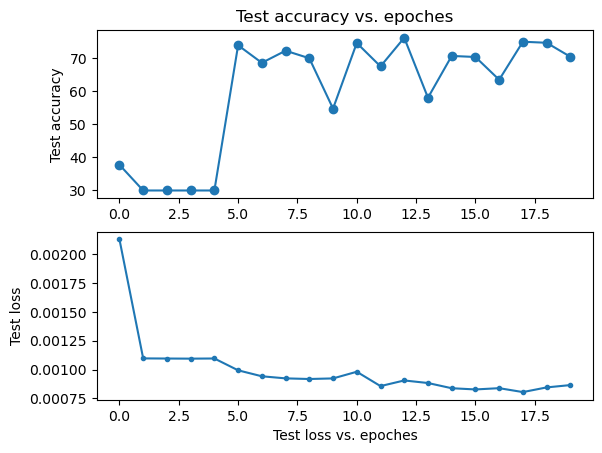

In [10]:
import matplotlib.pyplot as plt

x1 = range(0, epoch)
x2 = range(0, epoch)
y1 = accuracy_list
y2 = loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Test accuracy vs. epoches')
plt.ylabel('Test accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('Test loss vs. epoches')
plt.ylabel('Test loss')
plt.show()
# plt.savefig("accuracy_loss.jpg")


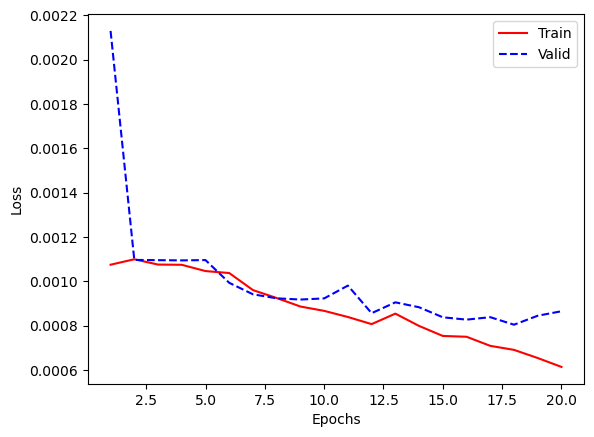

In [11]:
#distplot
import matplotlib.pyplot as plt
epochs =[i+1 for i in range(epoch)]
plt.plot(epochs,tr_loss_list, color='red', label='Train')
plt.plot(epochs,loss_list, '--', color='blue', label='Valid')
#plt.title('CrossEntropy') # title
plt.ylabel("Loss") # y label
plt.xlabel("Epochs") # x label
plt.legend() #圖例
#plt.savefig('.\\Model\\0618\\t_model_' + str(isbalence) + 'bz' + str(batch_sizes) + '_' + str(num_epochs) + '.png') #儲存圖檔
#plt.savefig('.\\Model\\0618\\實驗' + str(testnum) + '.png') #儲存圖檔
plt.show()

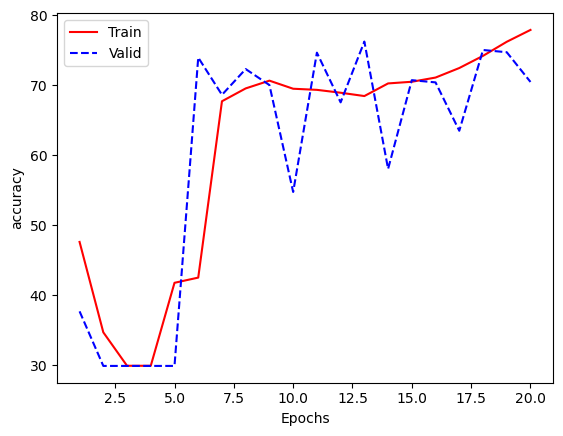

In [12]:
#distplot
import matplotlib.pyplot as plt
epochs =[i+1 for i in range(epoch)]
plt.plot(epochs,tr_accuracy_list, color='red', label='Train')
plt.plot(epochs,accuracy_list, '--', color='blue', label='Valid')
#plt.title('CrossEntropy') # title
plt.ylabel("accuracy") # y label
plt.xlabel("Epochs") # x label
plt.legend() #圖例
#plt.savefig('.\\Model\\0618\\t_model_' + str(isbalence) + 'bz' + str(batch_sizes) + '_' + str(num_epochs) + '.png') #儲存圖檔
#plt.savefig('.\\Model\\0618\\實驗' + str(testnum) + '.png') #儲存圖檔
plt.show()

In [13]:
#torch.save(model.state_dict(), "Resnet18_98_86.pt")


In [14]:
#混淆矩陣
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

In [15]:

tp=cm[0][0]
fn=cm[0][1]
fp=cm[1][0]
tn=cm[1][1]
print("Accuracy:",(tp+tn)/(tp+fn+fp+tn) )

p_presicion=tp/(tp+fp)
p_recall=tp/(tp+fn)
print('FIT precision:',p_presicion)
print('FIT recall:',p_recall)

n_presicion=tn/(tn+fn)
n_recall=tn/(fp+tn)
print('n_FIT precision:',n_presicion)
print('n_FIT recall:',n_recall)

print("F1",(2*p_presicion*p_recall)/(p_presicion+p_recall))

Accuracy: 0.5993020304568528
FIT precision: 0.8573584905660377
FIT recall: 0.5140271493212669
n_FIT precision: 0.4121510673234811
n_FIT recall: 0.7993630573248408
F1 0.6427157001414427


[0.         0.48597285 1.        ] [0.         0.79936306 1.        ] [2 1 0]


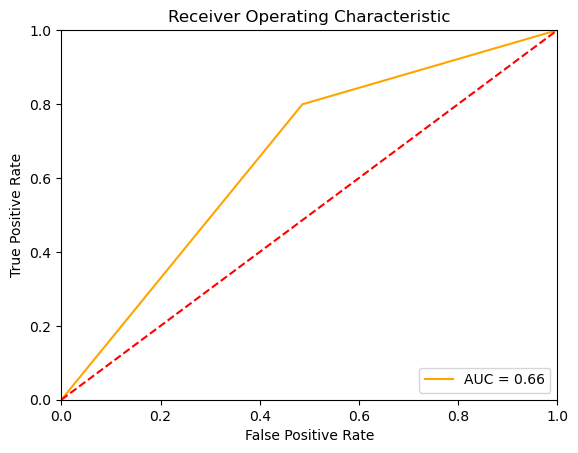

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_true, y_pred)
print(fpr, tpr, threshold)

auc1 = auc(fpr, tpr)
## Plot the result
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    